In [50]:
%matplotlib inline
import pandas as pd

path="C:\\Users\\nived\\Desktop\\Nivi ideapad Lenovo\\Nivoo SJ\\SJSU sem 2\\CS274\\project ideas\\nivedhitha book recomm\\data\\goodbooks-10k-master\\"
ratings = pd.read_csv( path+'ratings.csv' )
to_read = pd.read_csv( path+'to_read.csv' )
books = pd.read_csv( path+'books.csv' )

tags = pd.read_csv( path+'tags.csv' )
book_tags = pd.read_csv( path+'book_tags.csv')

#print len(r)


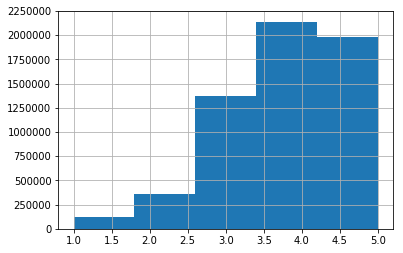

In [51]:
ratings.rating.hist( bins = 5 )

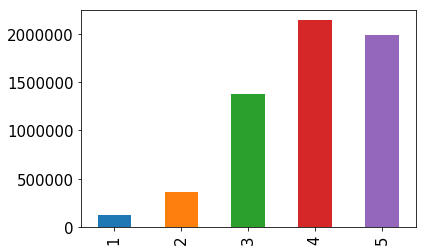

In [52]:
import matplotlib as plt
plt.rc("font",size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')

In [53]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [54]:
small_ratings=ratings[ratings.user_id<=50]
small_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [55]:
n_users=small_ratings.user_id.unique().shape[0]
n_books=small_ratings.book_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of books = ' + str(n_books))

Number of users = 50 | Number of books = 2447


In [56]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(small_ratings, test_size=0.25)

In [57]:
from math import*
  
def jaccard_similarity(x,y):
  
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 #print intersection_cardinality
 union_cardinality = len(set.union(*[set(x), set(y)]))
 #print union_cardinality 
 return intersection_cardinality/float(union_cardinality)
  
print(jaccard_similarity([0,0,2],[0,1,4]))

0.25


In [58]:
unique_ISBN=small_ratings.book_id.unique()
#unique_ISBN
item_item_sim = pd.DataFrame(index=unique_ISBN,columns=unique_ISBN).fillna(0)
item_item_sim.head()

,258,4081,260,9296,2318,26,315,33,301,2686,...,3013,2037,2840,6491,1954,7120,9034,6327,2818,1095
258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
item_data_matrix = small_ratings.pivot(index = 'user_id', columns ='book_id', values = 'rating').fillna(0)
item_data_matrix.head()

book_id,1,2,3,4,5,6,7,8,9,10,...,9909,9916,9934,9962,9966,9972,9974,9984,9990,9991
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
ii_sim_matrix=item_item_sim.as_matrix()
print(ii_sim_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
#4:12 to 4:24
#4:50
#item_item_simNew=item_item_sim
#didn't run this now
for idx1,user_row in enumerate(ii_sim_matrix):
    for idx2,book in enumerate(user_row):
        if idx1+1==10:
            print(idx1+1,idx2+1,user_row,book)
            

10 1 [0 0 0 ... 0 0 0] 0
10 2 [0 0 0 ... 0 0 0] 0
10 3 [0 0 0 ... 0 0 0] 0
10 4 [0 0 0 ... 0 0 0] 0
10 5 [0 0 0 ... 0 0 0] 0
10 6 [0 0 0 ... 0 0 0] 0
10 7 [0 0 0 ... 0 0 0] 0
10 8 [0 0 0 ... 0 0 0] 0
10 9 [0 0 0 ... 0 0 0] 0
10 10 [0 0 0 ... 0 0 0] 0
10 11 [0 0 0 ... 0 0 0] 0
10 12 [0 0 0 ... 0 0 0] 0
10 13 [0 0 0 ... 0 0 0] 0
10 14 [0 0 0 ... 0 0 0] 0
10 15 [0 0 0 ... 0 0 0] 0
10 16 [0 0 0 ... 0 0 0] 0
10 17 [0 0 0 ... 0 0 0] 0
10 18 [0 0 0 ... 0 0 0] 0
10 19 [0 0 0 ... 0 0 0] 0
10 20 [0 0 0 ... 0 0 0] 0
10 21 [0 0 0 ... 0 0 0] 0
10 22 [0 0 0 ... 0 0 0] 0
10 23 [0 0 0 ... 0 0 0] 0
10 24 [0 0 0 ... 0 0 0] 0
10 25 [0 0 0 ... 0 0 0] 0
10 26 [0 0 0 ... 0 0 0] 0
10 27 [0 0 0 ... 0 0 0] 0
10 28 [0 0 0 ... 0 0 0] 0
10 29 [0 0 0 ... 0 0 0] 0
10 30 [0 0 0 ... 0 0 0] 0
10 31 [0 0 0 ... 0 0 0] 0
10 32 [0 0 0 ... 0 0 0] 0
10 33 [0 0 0 ... 0 0 0] 0
10 34 [0 0 0 ... 0 0 0] 0
10 35 [0 0 0 ... 0 0 0] 0
10 36 [0 0 0 ... 0 0 0] 0
10 37 [0 0 0 ... 0 0 0] 0
10 38 [0 0 0 ... 0 0 0] 0
10 39 [0 0 0 ... 0 0 

10 413 [0 0 0 ... 0 0 0] 0
10 414 [0 0 0 ... 0 0 0] 0
10 415 [0 0 0 ... 0 0 0] 0
10 416 [0 0 0 ... 0 0 0] 0
10 417 [0 0 0 ... 0 0 0] 0
10 418 [0 0 0 ... 0 0 0] 0
10 419 [0 0 0 ... 0 0 0] 0
10 420 [0 0 0 ... 0 0 0] 0
10 421 [0 0 0 ... 0 0 0] 0
10 422 [0 0 0 ... 0 0 0] 0
10 423 [0 0 0 ... 0 0 0] 0
10 424 [0 0 0 ... 0 0 0] 0
10 425 [0 0 0 ... 0 0 0] 0
10 426 [0 0 0 ... 0 0 0] 0
10 427 [0 0 0 ... 0 0 0] 0
10 428 [0 0 0 ... 0 0 0] 0
10 429 [0 0 0 ... 0 0 0] 0
10 430 [0 0 0 ... 0 0 0] 0
10 431 [0 0 0 ... 0 0 0] 0
10 432 [0 0 0 ... 0 0 0] 0
10 433 [0 0 0 ... 0 0 0] 0
10 434 [0 0 0 ... 0 0 0] 0
10 435 [0 0 0 ... 0 0 0] 0
10 436 [0 0 0 ... 0 0 0] 0
10 437 [0 0 0 ... 0 0 0] 0
10 438 [0 0 0 ... 0 0 0] 0
10 439 [0 0 0 ... 0 0 0] 0
10 440 [0 0 0 ... 0 0 0] 0
10 441 [0 0 0 ... 0 0 0] 0
10 442 [0 0 0 ... 0 0 0] 0
10 443 [0 0 0 ... 0 0 0] 0
10 444 [0 0 0 ... 0 0 0] 0
10 445 [0 0 0 ... 0 0 0] 0
10 446 [0 0 0 ... 0 0 0] 0
10 447 [0 0 0 ... 0 0 0] 0
10 448 [0 0 0 ... 0 0 0] 0
10 449 [0 0 0 ... 0 0 0] 0
1

10 788 [0 0 0 ... 0 0 0] 0
10 789 [0 0 0 ... 0 0 0] 0
10 790 [0 0 0 ... 0 0 0] 0
10 791 [0 0 0 ... 0 0 0] 0
10 792 [0 0 0 ... 0 0 0] 0
10 793 [0 0 0 ... 0 0 0] 0
10 794 [0 0 0 ... 0 0 0] 0
10 795 [0 0 0 ... 0 0 0] 0
10 796 [0 0 0 ... 0 0 0] 0
10 797 [0 0 0 ... 0 0 0] 0
10 798 [0 0 0 ... 0 0 0] 0
10 799 [0 0 0 ... 0 0 0] 0
10 800 [0 0 0 ... 0 0 0] 0
10 801 [0 0 0 ... 0 0 0] 0
10 802 [0 0 0 ... 0 0 0] 0
10 803 [0 0 0 ... 0 0 0] 0
10 804 [0 0 0 ... 0 0 0] 0
10 805 [0 0 0 ... 0 0 0] 0
10 806 [0 0 0 ... 0 0 0] 0
10 807 [0 0 0 ... 0 0 0] 0
10 808 [0 0 0 ... 0 0 0] 0
10 809 [0 0 0 ... 0 0 0] 0
10 810 [0 0 0 ... 0 0 0] 0
10 811 [0 0 0 ... 0 0 0] 0
10 812 [0 0 0 ... 0 0 0] 0
10 813 [0 0 0 ... 0 0 0] 0
10 814 [0 0 0 ... 0 0 0] 0
10 815 [0 0 0 ... 0 0 0] 0
10 816 [0 0 0 ... 0 0 0] 0
10 817 [0 0 0 ... 0 0 0] 0
10 818 [0 0 0 ... 0 0 0] 0
10 819 [0 0 0 ... 0 0 0] 0
10 820 [0 0 0 ... 0 0 0] 0
10 821 [0 0 0 ... 0 0 0] 0
10 822 [0 0 0 ... 0 0 0] 0
10 823 [0 0 0 ... 0 0 0] 0
10 824 [0 0 0 ... 0 0 0] 0
1

10 1429 [0 0 0 ... 0 0 0] 0
10 1430 [0 0 0 ... 0 0 0] 0
10 1431 [0 0 0 ... 0 0 0] 0
10 1432 [0 0 0 ... 0 0 0] 0
10 1433 [0 0 0 ... 0 0 0] 0
10 1434 [0 0 0 ... 0 0 0] 0
10 1435 [0 0 0 ... 0 0 0] 0
10 1436 [0 0 0 ... 0 0 0] 0
10 1437 [0 0 0 ... 0 0 0] 0
10 1438 [0 0 0 ... 0 0 0] 0
10 1439 [0 0 0 ... 0 0 0] 0
10 1440 [0 0 0 ... 0 0 0] 0
10 1441 [0 0 0 ... 0 0 0] 0
10 1442 [0 0 0 ... 0 0 0] 0
10 1443 [0 0 0 ... 0 0 0] 0
10 1444 [0 0 0 ... 0 0 0] 0
10 1445 [0 0 0 ... 0 0 0] 0
10 1446 [0 0 0 ... 0 0 0] 0
10 1447 [0 0 0 ... 0 0 0] 0
10 1448 [0 0 0 ... 0 0 0] 0
10 1449 [0 0 0 ... 0 0 0] 0
10 1450 [0 0 0 ... 0 0 0] 0
10 1451 [0 0 0 ... 0 0 0] 0
10 1452 [0 0 0 ... 0 0 0] 0
10 1453 [0 0 0 ... 0 0 0] 0
10 1454 [0 0 0 ... 0 0 0] 0
10 1455 [0 0 0 ... 0 0 0] 0
10 1456 [0 0 0 ... 0 0 0] 0
10 1457 [0 0 0 ... 0 0 0] 0
10 1458 [0 0 0 ... 0 0 0] 0
10 1459 [0 0 0 ... 0 0 0] 0
10 1460 [0 0 0 ... 0 0 0] 0
10 1461 [0 0 0 ... 0 0 0] 0
10 1462 [0 0 0 ... 0 0 0] 0
10 1463 [0 0 0 ... 0 0 0] 0
10 1464 [0 0 0 ... 0

10 1804 [0 0 0 ... 0 0 0] 0
10 1805 [0 0 0 ... 0 0 0] 0
10 1806 [0 0 0 ... 0 0 0] 0
10 1807 [0 0 0 ... 0 0 0] 0
10 1808 [0 0 0 ... 0 0 0] 0
10 1809 [0 0 0 ... 0 0 0] 0
10 1810 [0 0 0 ... 0 0 0] 0
10 1811 [0 0 0 ... 0 0 0] 0
10 1812 [0 0 0 ... 0 0 0] 0
10 1813 [0 0 0 ... 0 0 0] 0
10 1814 [0 0 0 ... 0 0 0] 0
10 1815 [0 0 0 ... 0 0 0] 0
10 1816 [0 0 0 ... 0 0 0] 0
10 1817 [0 0 0 ... 0 0 0] 0
10 1818 [0 0 0 ... 0 0 0] 0
10 1819 [0 0 0 ... 0 0 0] 0
10 1820 [0 0 0 ... 0 0 0] 0
10 1821 [0 0 0 ... 0 0 0] 0
10 1822 [0 0 0 ... 0 0 0] 0
10 1823 [0 0 0 ... 0 0 0] 0
10 1824 [0 0 0 ... 0 0 0] 0
10 1825 [0 0 0 ... 0 0 0] 0
10 1826 [0 0 0 ... 0 0 0] 0
10 1827 [0 0 0 ... 0 0 0] 0
10 1828 [0 0 0 ... 0 0 0] 0
10 1829 [0 0 0 ... 0 0 0] 0
10 1830 [0 0 0 ... 0 0 0] 0
10 1831 [0 0 0 ... 0 0 0] 0
10 1832 [0 0 0 ... 0 0 0] 0
10 1833 [0 0 0 ... 0 0 0] 0
10 1834 [0 0 0 ... 0 0 0] 0
10 1835 [0 0 0 ... 0 0 0] 0
10 1836 [0 0 0 ... 0 0 0] 0
10 1837 [0 0 0 ... 0 0 0] 0
10 1838 [0 0 0 ... 0 0 0] 0
10 1839 [0 0 0 ... 0

10 2178 [0 0 0 ... 0 0 0] 0
10 2179 [0 0 0 ... 0 0 0] 0
10 2180 [0 0 0 ... 0 0 0] 0
10 2181 [0 0 0 ... 0 0 0] 0
10 2182 [0 0 0 ... 0 0 0] 0
10 2183 [0 0 0 ... 0 0 0] 0
10 2184 [0 0 0 ... 0 0 0] 0
10 2185 [0 0 0 ... 0 0 0] 0
10 2186 [0 0 0 ... 0 0 0] 0
10 2187 [0 0 0 ... 0 0 0] 0
10 2188 [0 0 0 ... 0 0 0] 0
10 2189 [0 0 0 ... 0 0 0] 0
10 2190 [0 0 0 ... 0 0 0] 0
10 2191 [0 0 0 ... 0 0 0] 0
10 2192 [0 0 0 ... 0 0 0] 0
10 2193 [0 0 0 ... 0 0 0] 0
10 2194 [0 0 0 ... 0 0 0] 0
10 2195 [0 0 0 ... 0 0 0] 0
10 2196 [0 0 0 ... 0 0 0] 0
10 2197 [0 0 0 ... 0 0 0] 0
10 2198 [0 0 0 ... 0 0 0] 0
10 2199 [0 0 0 ... 0 0 0] 0
10 2200 [0 0 0 ... 0 0 0] 0
10 2201 [0 0 0 ... 0 0 0] 0
10 2202 [0 0 0 ... 0 0 0] 0
10 2203 [0 0 0 ... 0 0 0] 0
10 2204 [0 0 0 ... 0 0 0] 0
10 2205 [0 0 0 ... 0 0 0] 0
10 2206 [0 0 0 ... 0 0 0] 0
10 2207 [0 0 0 ... 0 0 0] 0
10 2208 [0 0 0 ... 0 0 0] 0
10 2209 [0 0 0 ... 0 0 0] 0
10 2210 [0 0 0 ... 0 0 0] 0
10 2211 [0 0 0 ... 0 0 0] 0
10 2212 [0 0 0 ... 0 0 0] 0
10 2213 [0 0 0 ... 0

In [65]:
for isbn1 in item_item_sim.columns:
    for isbn2 in item_item_sim.columns:
        if isbn1!=isbn2 :
            ratings_isbn1= item_data_matrix[isbn1]
            ratings_isbn2= item_data_matrix[isbn2]
            jaccard_sim=jaccard_similarity(ratings_isbn1,ratings_isbn2)
            item_item_sim.set_value(isbn1,isbn2,jaccard_sim)
            #item_item_simNew.at[isbn1,isbn2]=jaccard_sim
            #print(jaccard_sim, isbn1, isbn2)
            #print("where to put column", isbn2)
            #print("where to put row", isbn1)
            #item_item_sim[isbn2][isbn1]=jaccard_sim
            #item_item_simNew.at[isbn2, isbn1] = jaccard_sim

c:\users\nived\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
